In [1]:
#import lib
import numpy as np
import pandas as pd

In [2]:
#import dataset
dataset =pd.read_csv("SMSSpamCollection",sep='\t' ,names=['label','message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset['label'] =dataset['label'].map({'ham':0,'spam':1})

In [7]:
dataset

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

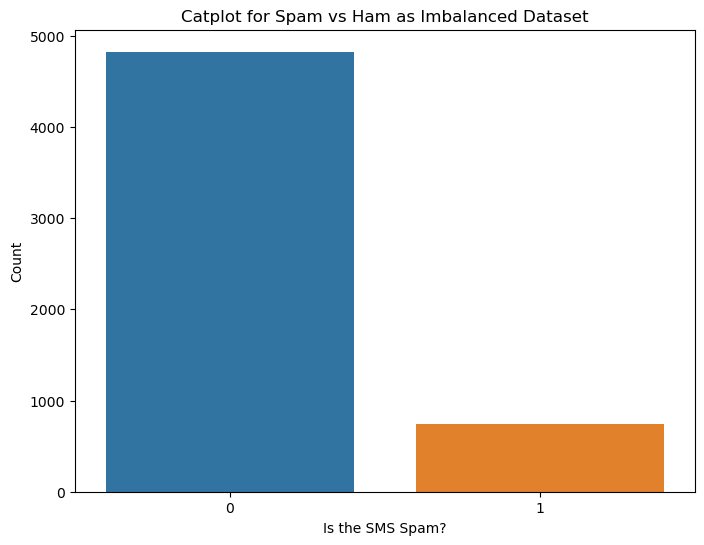

In [9]:
#countplot for spam / ham as imbalanced dataset
plt.figure(figsize=(8, 6))  # This creates a new figure
sns.countplot(x='label', data=dataset)
plt.title('Catplot for Spam vs Ham as Imbalanced Dataset')
plt.xlabel('Is the SMS Spam?')
plt.ylabel('Count')
plt.show()  # Display the plot

In [10]:
#handling imbalanaced dataset using oversampling
only_spam= dataset[dataset["label"]==1]

In [11]:
only_spam

,label,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
# Creating new feature: word_count
dataset['word_count'] = dataset['message'].apply(lambda x: len(x.split()))

In [13]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30
5568,0,Will ü b going to esplanade fr home?,8
5569,0,"Pity, * was in mood for that. So...any other s...",10
5570,0,The guy did some bitching but I acted like i'd...,26


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1200x600 with 0 Axes>

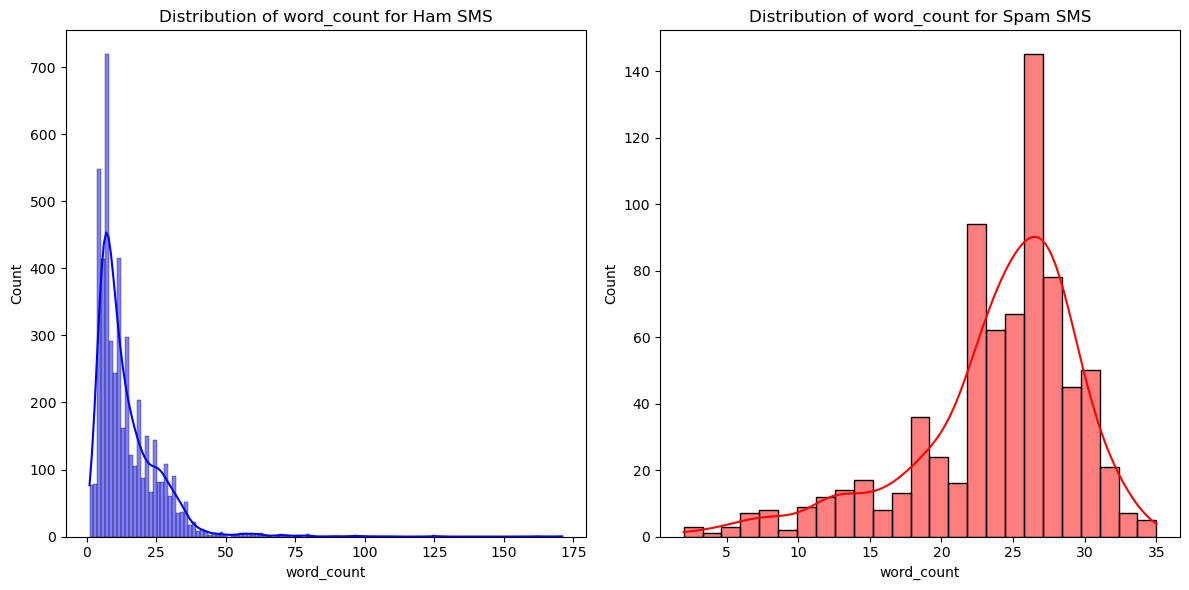

In [14]:
plt.figure(figsize=(12,6))

# Plotting histogram for word_count of Ham SMS
plt.figure(figsize=(12, 6))  # Adjust the figure size
plt.subplot(1, 2, 1)  # First subplot in a 1x2 grid
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True, color='blue')
p = plt.title('Distribution of word_count for Ham SMS')

# Plotting histogram for word_count of Spam SMS
plt.subplot(1, 2, 2)  # Second subplot in a 1x2 grid
g = sns.histplot(dataset[dataset["label"] == 1].word_count, kde=True, color='red')
p = plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [15]:
#creating new features of containing currency symbols
def currency(data):
    currency_symbols = ['€', '$', '¥', '£', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [16]:
# Apply the function to create the new feature
dataset["contains_currency_symbols"] = dataset["message"].apply(currency)

# Display the dataset
print(dataset)


      label                                            message  word_count  \
0         0  Go until jurong point, crazy.. Available only ...          20   
1         0                      Ok lar... Joking wif u oni...           6   
2         1  Free entry in 2 a wkly comp to win FA Cup fina...          28   
3         0  U dun say so early hor... U c already then say...          11   
4         0  Nah I don't think he goes to usf, he lives aro...          13   
...     ...                                                ...         ...   
5567      1  This is the 2nd time we have tried 2 contact u...          30   
5568      0               Will ü b going to esplanade fr home?           8   
5569      0  Pity, * was in mood for that. So...any other s...          10   
5570      0  The guy did some bitching but I acted like i'd...          26   
5571      0                         Rofl. Its true to its name           6   

      contains_currency_symbols  
0                            

In [17]:
dataset

,label,message,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30,1
5568,0,Will ü b going to esplanade fr home?,8,0
5569,0,"Pity, * was in mood for that. So...any other s...",10,0
5570,0,The guy did some bitching but I acted like i'd...,26,0


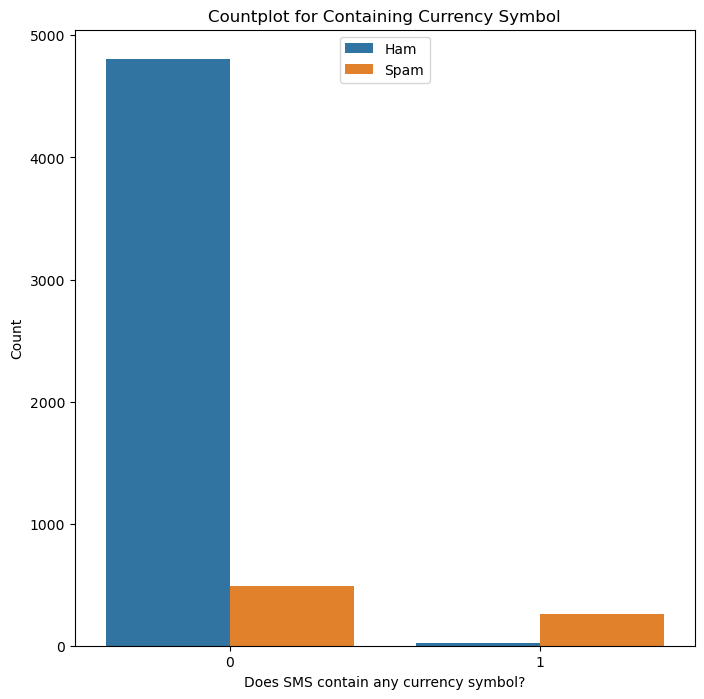

In [18]:
# Ensure the "label" column is of string type
dataset["label"] = dataset["label"].astype(str)

# Plot the countplot for contains_currency_symbols
plt.figure(figsize=(8, 8))
g = sns.countplot(x="contains_currency_symbols", data=dataset, hue="label")
p = plt.title("Countplot for Containing Currency Symbol")
p = plt.xlabel("Does SMS contain any currency symbol?")
p = plt.ylabel("Count")
p = plt.legend(labels=["Ham", "Spam"], loc=9)
plt.show()

In [19]:
def number(data):
    for i in data:
        if ord(i) >= 48 and ord(i) <= 57:  # ASCII range for digits (0-9)
            return 1
    return 0


In [20]:
# Apply the function to add the new column
dataset["contains_number"] = dataset["message"].apply(number)

In [21]:
# Display the dataset
dataset

,label,message,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,30,1,1
5568,0,Will ü b going to esplanade fr home?,8,0,0
5569,0,"Pity, * was in mood for that. So...any other s...",10,0,0
5570,0,The guy did some bitching but I acted like i'd...,26,0,0


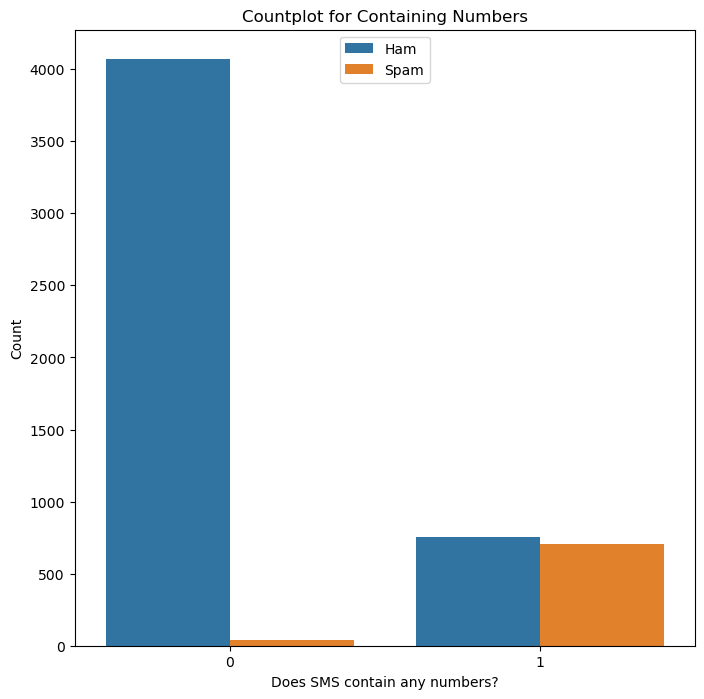

In [22]:
# Plot the countplot for contains_number
plt.figure(figsize=(8, 8))
sns.countplot(x="contains_number", data=dataset, hue="label")
plt.title("Countplot for Containing Numbers")
plt.xlabel("Does SMS contain any numbers?")
plt.ylabel("Count")
plt.legend(labels=["Ham", "Spam"], loc=9)  # Adjust legend labels
plt.show()

In [ ]:
# Data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [ ]:
corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.message):
    message = re.sub(pattern="[^a-zA-Z]", repl=' ', string=sms)  # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()  # Tokenizer
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    corpus.append(message)

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

X = pd.DataFrame(vectors, columns=feature_names)
y = dataset['label']

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test

In [ ]:
# Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(), 3))
print(round(cv.std(), 3))


In [ ]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)


In [ ]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv1.mean(), 3))
print(round(cv1.std(), 3))


In [ ]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

print(classification_report(y_test, y_pred1))

cm = confusion_matrix(y_test, y_pred1)
print(cm)

In [ ]:
plt.figure(figsize=(8,8))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot= True, fmt='g', cbar_kws={"shrink":0.5}, cmap= 'Blue')
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel("Actual values")
p = plt.ylabel("Predicted values")


In [ ]:
def predict_spam(sms):
    message = re.sub(pattern="[a-zA-Z]", repl=" ", string=sms)  # Filtering out special characters and numbers
    message = message.lower()
    words = message.split()  # Tokenize
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm = WordNetLemmatizer()
    lemm_words = [lemm.lemmatize(word) for word in filtered_words]
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [ ]:
# Prediction 1 - Lottery text message
sample_message = "IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan."
if predict_spam(sample_message):
    print("Gotcha! This is a SPAM message.")
else:
    print("This is a HAM (normal) message.")

# Prediction 2 - Casual text chat
sample_message = "Came to think of it. I have never got a spam message before."
if predict_spam(sample_message):
    print("Gotcha! This is a SPAM message.")
else:
    print("This is a HAM (normal) message.")

In [ ]:
# Prediction 2 - Casual text chat
sample_message = 'Came to think of it. I have never got a spam message before.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')

# Prediction 3 - Transaction confirmation text message
sample_message = 'Sam, your rent payment for Jan 19 has been received. $1,300 will be drafted from your Wells Fargo Account **.'

if predict_spam(sample_message):
    print('Gotcha! This is a SPAM message.')
else:
    print('This is a HAM (normal) message.')
